In [1]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
data=pd.read_csv(r'D:\DS-Input-Files\Ecommerce.csv')
data.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [3]:
#Checking whether any data is null
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
data.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [5]:
x=data.drop(['Address','Time on App','Email','Avatar'],axis=1)
x.head(2)
y=data['Time on Website']
y.head(2)

0    39.577668
1    37.268959
Name: Time on Website, dtype: float64

In [6]:
x.head(2)

,Avg. Session Length,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,39.577668,4.082621,587.951054
1,31.926272,37.268959,2.664034,392.204933


In [7]:
#Train test split
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [9]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((300, 4), (300,), (200, 4), (200,))

In [10]:
#Preprocessing - Standardising Scaling
from sklearn.preprocessing import StandardScaler

In [11]:
scx=StandardScaler()

In [12]:
x_train_std=scx.fit_transform(x_train)

In [13]:
#Model Selection - Linear model
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [16]:
lr.intercept_ , lr.coef_

(37.06101975974444,
 array([-4.90347711e-17,  9.83566411e-01, -1.11022302e-16, -1.11022302e-16]))

In [22]:
x_test_std=scx.fit_transform(x_test)

In [23]:
#Predict Errors and Scores
test_pred=lr.predict(x_test_std)

In [24]:
#Import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
print("Errors and Scores for Time on Website\n")
print("MAE is ",mean_absolute_error(y_test,test_pred))
print("MSE is ",mean_squared_error(y_test,test_pred))
print("R2 score is ",r2_score(y_test,test_pred))

Errors and Scores for Time on Website

MAE is  0.05044741575265672
MSE is  0.004044051073510437
R2 score is  0.996311883763258


In [26]:
x1=data.drop(['Email','Address','Avatar','Time on Website'],axis=1)
y1=data['Time on Website']

In [27]:
y1.head(2)

0    39.577668
1    37.268959
Name: Time on Website, dtype: float64

In [28]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.4)

In [29]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((300, 4), (200, 4), (300,), (200,))

In [30]:
#Standardising
scx1=StandardScaler()

In [42]:
x1_train_std=scx1.fit_transform(x1_train)
x1_test_std=scx.fit_transform(x1_test)

In [43]:
#Fit the model
lr1=LinearRegression()

In [44]:
lr1.fit(x1_train_std,y1_train)

LinearRegression()

In [45]:
test1_pred=lr1.predict(x1_test_std)

In [51]:
#Print Erros and Scores
print("Error and scores for Time on App \n")
print("MAE is ",mean_absolute_error(y1_test,test1_pred))
print("MSE is ",mean_squared_error(y1_test,test1_pred))
print("R2 score is",r2_score(y1_test,test1_pred))

Error and scores for Time on App 

MAE is  0.10520521314168021
MSE is  0.011335465239638957
R2 score is 0.9890605547127234


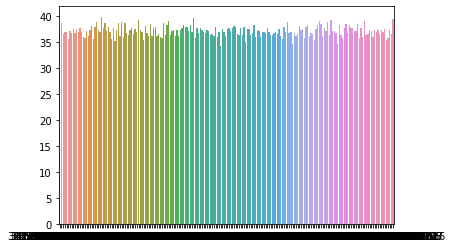

In [53]:
sns.barplot(test1_pred,test_pred)